In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pyFTS.benchmarks import ResidualAnalysis, Measures
from scipy.special import boxcox, inv_boxcox

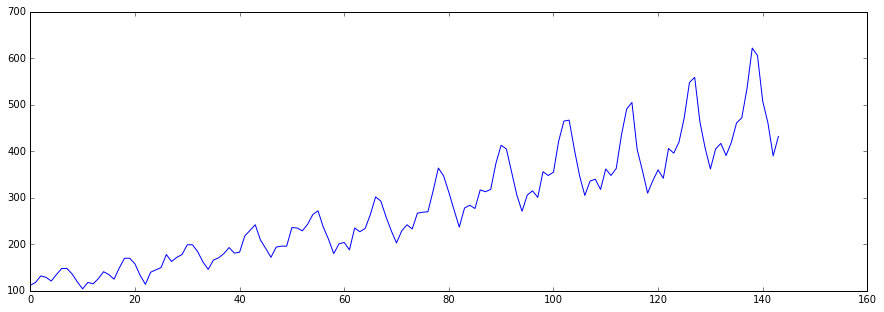

In [2]:
## Leitura da base de dados
passengers = pd.read_csv("AirPassengers.csv", sep=",")
passengers = np.array(passengers["Passengers"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
axes.plot(passengers)

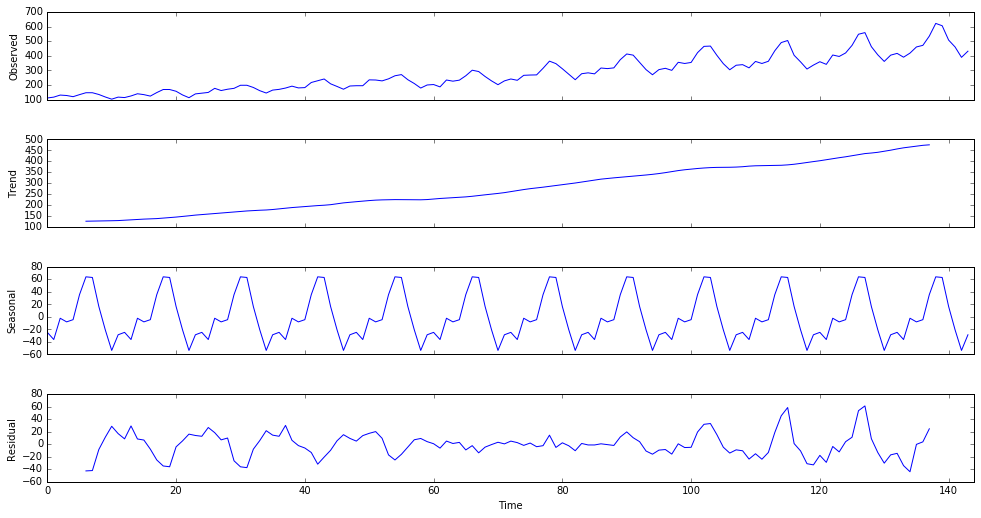

In [3]:
decomposition = seasonal_decompose(passengers, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

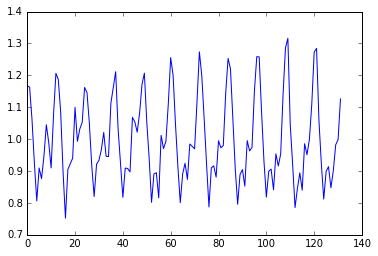

In [5]:
trend_air = decomposition.trend

detrend_air = passengers / trend_air
detrend_air = detrend_air[~np.isnan(detrend_air)]

plt.plot(detrend_air)

In [6]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


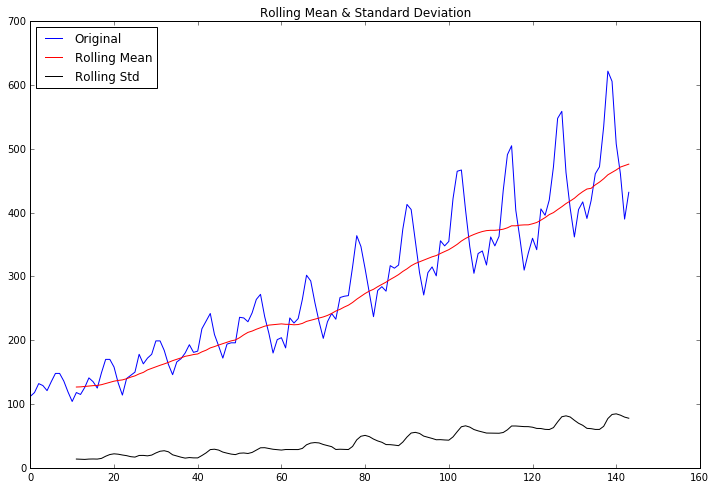

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [7]:
test_stationarity(passengers)

C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


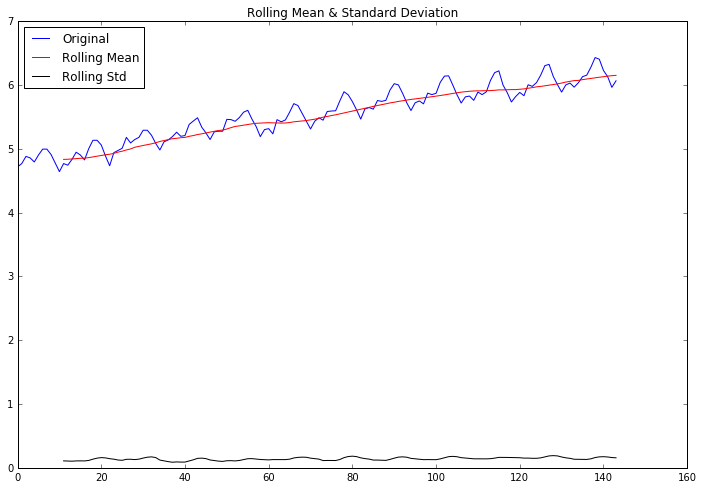

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [8]:
passengers_log = np.array([ np.log(x) for x in passengers])
test_stationarity(passengers_log)

[112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149
 170 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166
 171 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243
 264 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229
 242 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374
 413 405 355 306 271 306 315 301 356 348 355 422 465 467 404 347 305 336
 340 318 362 348 363 435 491 505 404 359 310 337 360 342 406 396 420 472
 548 559 463 407 362 405 417 391 419 461 472 535 622 606 508 461 390 432]
[  0 112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125
 149 170 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146
 166 171 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229
 243 264 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203
 229 242 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318
 374 413 405 355 306 271 306 315 301 356 348 355 4

C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


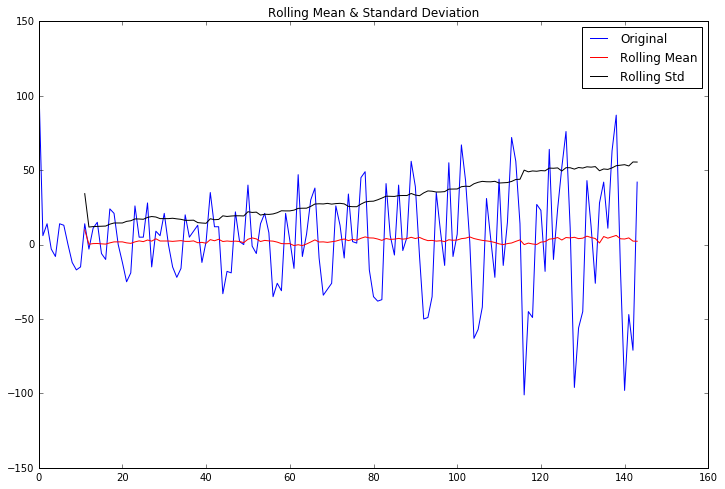

Results of Dickey-Fuller Test:
Test Statistic                  -3.155112
p-value                          0.022734
#Lags Used                      12.000000
Number of Observations Used    131.000000
Critical Value (10%)            -2.578677
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
dtype: float64


In [5]:
from scipy.ndimage.interpolation import shift

passengers_shift = shift(passengers, 1)
print(passengers)
print(passengers_shift)

passengers_first_difference = passengers - passengers_shift  
test_stationarity(passengers_first_difference)

[112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149
 170 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166
 171 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243
 264 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229
 242 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374
 413 405 355 306 271 306 315 301 356 348 355 422 465 467 404 347 305 336
 340 318 362 348 363 435 491 505 404 359 310 337 360 342 406 396 420 472
 548 559 463 407 362 405 417 391 419 461 472 535 622 606 508 461 390 432]
[  0   0   0   0   0   0   0   0   0   0   0   0 112 118 132 129 121 135
 148 148 136 119 104 118 115 126 141 135 125 149 170 170 158 133 114 140
 145 150 178 163 172 178 199 199 184 162 146 166 171 180 193 181 183 218
 230 242 209 191 172 194 196 196 236 235 229 243 264 272 237 211 180 201
 204 188 235 227 234 264 302 293 259 229 203 229 242 233 267 269 270 315
 364 347 312 274 237 278 284 277 317 313 318 374 4

C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


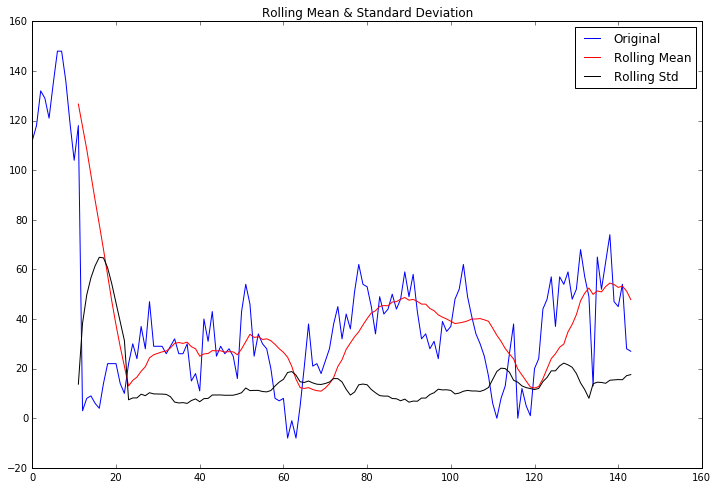

Results of Dickey-Fuller Test:
Test Statistic                  -3.162946
p-value                          0.022232
#Lags Used                       1.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (10%)            -2.577743
Critical Value (5%)             -2.882118
dtype: float64


In [29]:
from scipy.ndimage.interpolation import shift

passengers_12shift = shift(passengers, 12)
print(passengers)
print(passengers_12shift)

passengers_season_difference = passengers - passengers_12shift  
test_stationarity(passengers_season_difference)

In [18]:
from scipy.ndimage.interpolation import shift

passengers_12fdshift = shift(passengers_first_difference, 12)
print(passengers)
print(passengers_12fdshift)

passengers_season_first_difference = passengers_first_difference - passengers_12fdshift  
test_stationarity(passengers_season_first_difference)

NameError: name 'passengers_first_difference' is not defined

C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\cseve\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


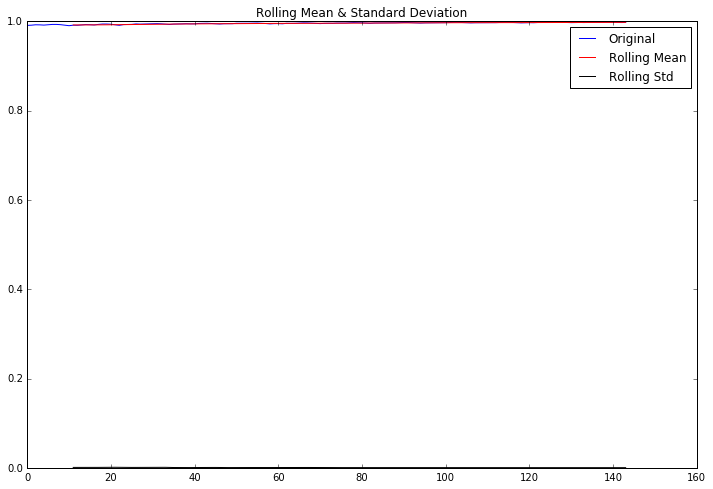

Results of Dickey-Fuller Test:
Test Statistic                  -3.584421
p-value                          0.006066
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [40]:
dados_transformados = boxcox(passengers, -1)
test_stationarity(dados_transformados)

#novos_dados_originais = bc.inverse(dados_transformados)



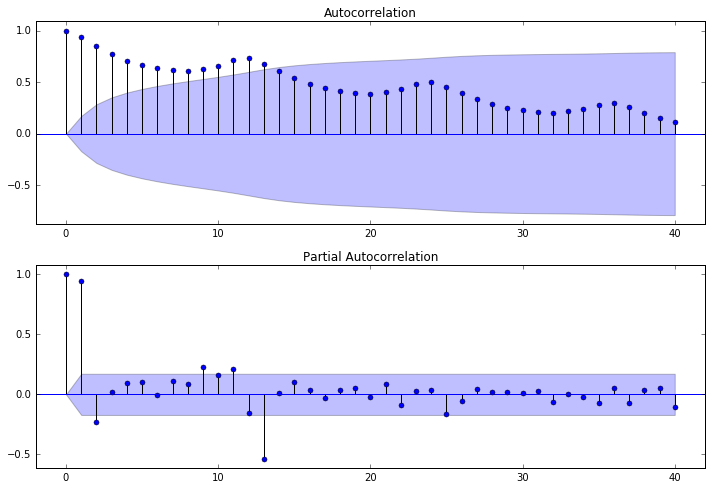

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(passengers[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(passengers[13:], lags=40, ax=ax2)

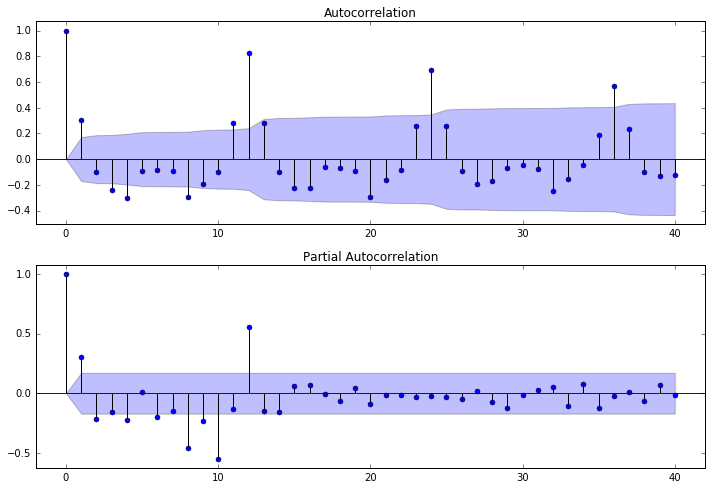

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(passengers_first_difference[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(passengers_first_difference[13:], lags=40, ax=ax2)

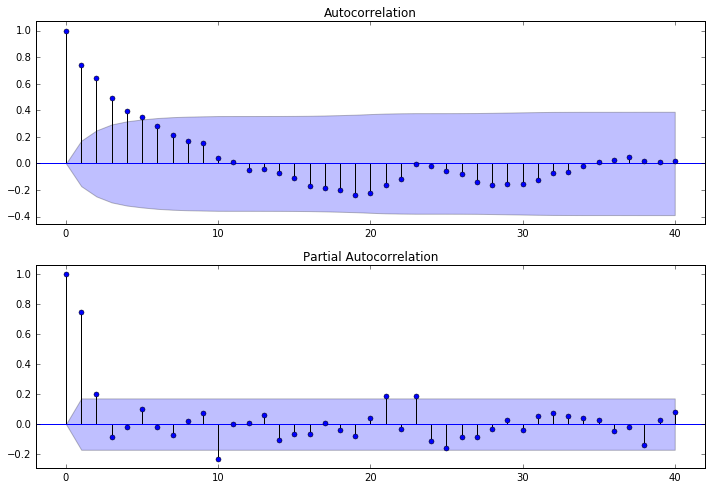

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(passengers_season_difference[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(passengers_season_difference[13:], lags=40, ax=ax2)

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   80
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -252.099
Date:                            Thu, 26 Oct 2017   AIC                            514.198
Time:                                    19:38:16   BIC                            526.108
Sample:                                         0   HQIC                           518.973
                                             - 80                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9830      0.029     33.875      0.000       0.926       1.040
ma.L1         -0.2308      0.124   

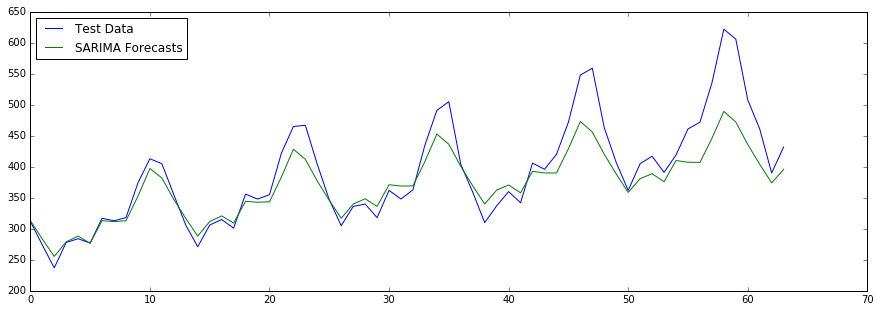

In [33]:
ts = 80

trainp = passengers[:ts]
testp = passengers[ts:]

mod = sm.tsa.statespace.SARIMAX(trainp, trend='n', order=(1,0,1), seasonal_order=(1,1,1,12))

results = mod.fit()
print (results.summary())

forecast = results.predict(start=ts, end=passengers.size-1)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

axes.plot(testp, label="Test Data")
axes.plot(forecast, label="SARIMA Forecasts")

handles0, labels0 = axes.get_legend_handles_labels()
lgd = axes.legend(handles0, labels0, loc=2)

import statsmodels.tools.eval_measures as ms

print("RMSE: ", Measures.rmse(testp, forecast))
print("MAPE: ", Measures.mape(testp, forecast))
print("U: ", Measures.UStatistic(testp, forecast))


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   80
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 12)   Log Likelihood                 113.035
Date:                            Thu, 26 Oct 2017   AIC                           -218.070
Time:                                    19:49:55   BIC                           -208.542
Sample:                                         0   HQIC                          -214.250
                                             - 80                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9908      0.014     71.189      0.000       0.963       1.018
ma.L1         -0.4262      0.132   

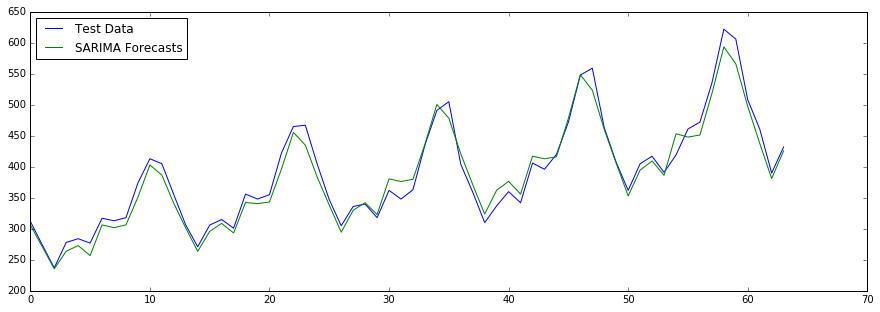

In [49]:
passengers_bc = boxcox(passengers, 0)

ts = 80

trainp = passengers_bc[:ts]
testp = passengers[ts:]
mod = sm.tsa.statespace.SARIMAX(trainp, trend='n', order=(1,0,1), seasonal_order=(1,1,0,12))

results = mod.fit()
print (results.summary())

forecast_bc = results.predict(start=ts, end=passengers.size-1)
forecast = inv_boxcox(forecast_bc, 0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

axes.plot(testp, label="Test Data")
axes.plot(forecast, label="SARIMA Forecasts")

handles0, labels0 = axes.get_legend_handles_labels()
lgd = axes.legend(handles0, labels0, loc=2)

import statsmodels.tools.eval_measures as ms

print("RMSE: ", Measures.rmse(testp, forecast))
print("MAPE: ", Measures.mape(testp, forecast))
print("U: ", Measures.UStatistic(testp, forecast))